In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Scale the data to [0, 1] range
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Set the dimensions of the SOM grid
grid_size = (10, 10)  # You can adjust the size based on your preference

In [5]:
# Create the Self-Organizing Map
som = MiniSom(grid_size[0], grid_size[1], X.shape[1], sigma=1.0, learning_rate=0.5)

# Initialize the weights of the map
som.random_weights_init(X)

# Train the map on the data
num_epochs = 1000  # You can adjust the number of epochs based on your preference
som.train_random(X, num_epochs)

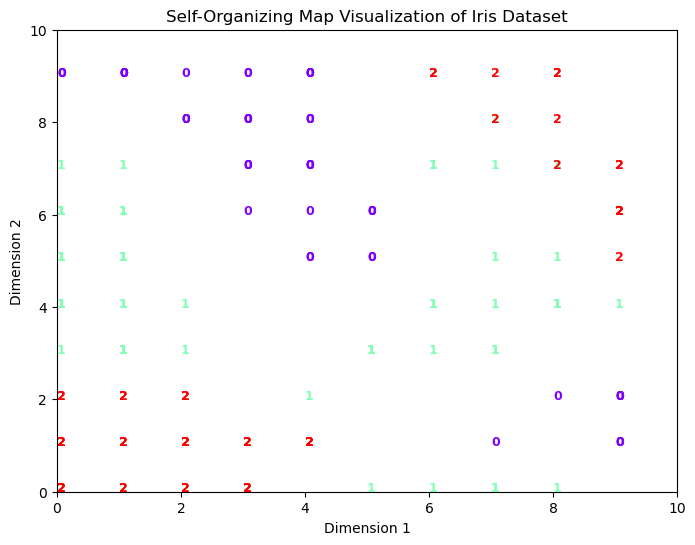

In [8]:
# Create a visualization of the SOM
plt.figure(figsize=(8, 6))
for i, x in enumerate(X):
    w = som.winner(x)  # Find the winning neuron for each data point
    plt.text(w[0], w[1], str(y[i]), color=plt.cm.rainbow(y[i] / 2.0), fontdict={'weight': 'bold', 'size': 9})

plt.axis([0, grid_size[0], 0, grid_size[1]])
plt.title("Self-Organizing Map Visualization of Iris Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# # Add a colorbar to show the mapping of classes to colors
# cbar = plt.colorbar(boundaries=np.arange(4) - 0.5)
# cbar.set_ticks(np.arange(3))
# cbar.set_ticklabels(iris.target_names)
plt.show()
